## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 016B

In [1]:
from sklearn.tree import ExtraTreeClassifier

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../Data/Roses01.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Roses01.csv


In [3]:
rosedf= pd.read_csv(fileFullName, header=0)
print(rosedf.shape)
print(rosedf.columns)

(150, 6)
Index(['F01', 'F02', 'F03', 'F04', 'T', 'T2'], dtype='object')


In [4]:
rose = np.array(rosedf)
rose_data = np.array(rosedf[['F01', 'F02', 'F03', 'F04']].copy(deep=True))
rose_target = np.array(rosedf[['T2']].copy(deep=True))

In [5]:
rose_target_name = ['Blaze','Venus','Honeymilk']

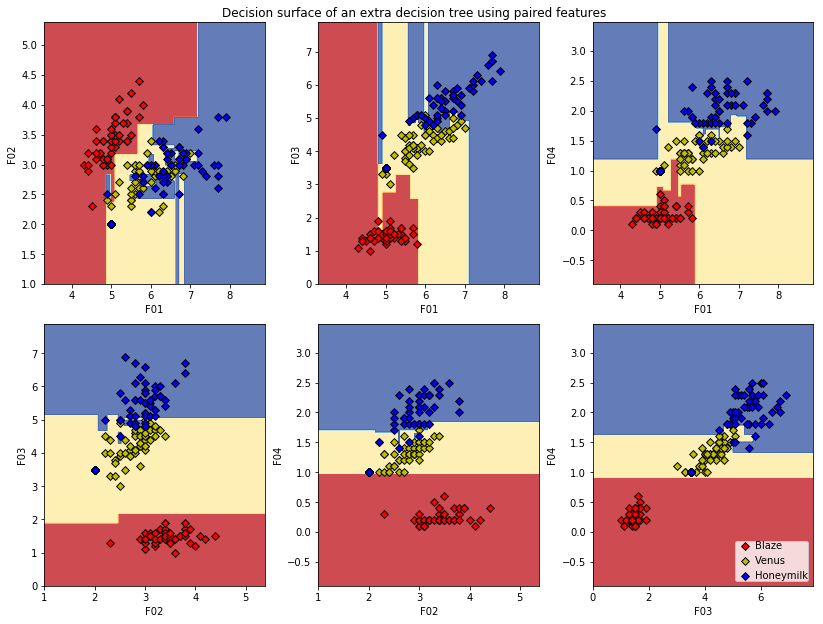

In [6]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

fig=plt.figure(figsize=(12,9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # Only take the two corresponding features
    X = rose_data[:, pair]
    y = rose_target

    # Train
    clf = ExtraTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    plt.xlabel(rosedf.columns[pair[0]])
    plt.ylabel(rosedf.columns[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=rose_target_name[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=30, marker='D', alpha=1.0)

plt.suptitle("Decision surface of an extra decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()


In [7]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [8]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [9]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04','Chapter-004-Example-016-02.jpg'])
fig.savefig(imagename, bbox_inches='tight')

In [10]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-08 19:38:27.780735
